<a href="https://colab.research.google.com/github/Ankur099IIT/Introduction-to-Tensorflow-for-AI-ML-and-DS_coursera_Ankur-codes/blob/main/Training_with_ImageDataGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2022-04-23 10:00:12--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.199.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   191MB/s    in 0.7s    

2022-04-23 10:00:13 (191 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [2]:
import zipfile

local_zip = 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [3]:
import os
train_horse_dir = os.path.join('/content/horse-or-human/horses')
train_human_dir = os.path.join('/content/horse-or-human/humans')

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse41-4.png', 'horse47-2.png', 'horse02-6.png', 'horse06-9.png', 'horse19-2.png', 'horse24-0.png', 'horse41-5.png', 'horse19-3.png', 'horse49-9.png', 'horse13-2.png']
['human04-27.png', 'human08-13.png', 'human14-04.png', 'human13-10.png', 'human08-04.png', 'human14-14.png', 'human01-00.png', 'human14-23.png', 'human16-15.png', 'human15-05.png']


In [5]:
len(train_horse_names), len(train_human_names)

(500, 527)

/content/horse-or-human/horses/horse41-4.png
/content/horse-or-human/horses/horse47-2.png
/content/horse-or-human/horses/horse02-6.png
/content/horse-or-human/horses/horse06-9.png
/content/horse-or-human/horses/horse19-2.png
/content/horse-or-human/horses/horse24-0.png
/content/horse-or-human/horses/horse41-5.png
/content/horse-or-human/horses/horse19-3.png


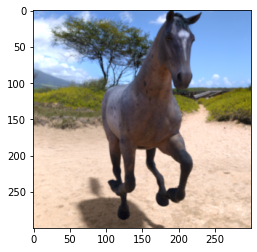

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



for item in train_horse_names[0:8]:
  next_horse_pix = os.path.join(train_horse_dir, item)
  img = mpimg.imread(next_horse_pix)
  plt.imshow(img)
  print(next_horse_pix)
plt.show()

In [27]:
import tensorflow as tf

In [31]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (300, 300, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=512, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 35, 35, 64)       0

In [36]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
train_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(
    '/content/horse-or-human',
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [43]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    epochs = 15,
                    verbose = 1)

Epoch 1/15
8/8 [==============================] - 18s 1s/step - loss: 3.5486 - accuracy: 0.4772
Epoch 2/15
8/8 [==============================] - 6s 743ms/step - loss: 0.6098 - accuracy: 0.7030
Epoch 3/15
8/8 [==============================] - 6s 733ms/step - loss: 0.3480 - accuracy: 0.9066
Epoch 4/15
8/8 [==============================] - 6s 735ms/step - loss: 0.1222 - accuracy: 0.9677
Epoch 5/15
8/8 [==============================] - 6s 712ms/step - loss: 0.0609 - accuracy: 0.9855
Epoch 6/15
8/8 [==============================] - 6s 861ms/step - loss: 0.0951 - accuracy: 0.9655
Epoch 7/15
8/8 [==============================] - 6s 743ms/step - loss: 0.0773 - accuracy: 0.9689
Epoch 8/15
8/8 [==============================] - 6s 726ms/step - loss: 0.0416 - accuracy: 0.9833
Epoch 9/15
8/8 [==============================] - 6s 741ms/step - loss: 0.0273 - accuracy: 0.9911
Epoch 10/15
8/8 [==============================] - 7s 836ms/step - loss: 0.0150 - accuracy: 0.9980
Epoch 11/15
8/8 [====